<a href="https://colab.research.google.com/github/Pavan250599/Financial-Churn-Predictor/blob/main/Customer_churn_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

One of the prestigious bank maintains a database of the customer and their details. Based on this dataset the requirememt is to create the classification model using Logistic Regression to predict if the customer will churn or not. There are around 10000 records using this we need to create the model after breaking the data into test and train.

**Data Dictionary**

**RowNumber** - Unique number

**CustomerID** - Unique Customer ID

**Surname** - Last name of the customer

**CreditScore** - Credit Score of the customer based on the past payments

**Geography** - Country of the customer

**Gender** - Gender of the customer

**Age** - Age of the customer

**Tenure** - Duration of the relationship with the customer

**Balance** - Bank balance of the customer

**NumOfProducts** - Total number of products customer opted for

**HasCrCard** - Has credit card or not

**IsActiveMember** - Is the customer is active or not

**EstimatedSalary** - Customer's estimated salary

**Exited** - Churn value

<a id="lib"></a>
# Import Libraries

In [ ]:
#Importing the libraries which will be helpful for the data analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="prep"></a>
# Data Preparation

In [ ]:
#Importing the dataset which we will use for the modelling
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Logistic Regression/Churn_Modelling.csv')

<a id="read"></a>
# Understand the Data

In [ ]:
#The info command will help us to understand the different columns present in the dataset and its datatype
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              9992 non-null   float64
 7   Tenure           9994 non-null   float64
 8   Balance          9992 non-null   float64
 9   NumOfProducts    9991 non-null   float64
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  9992 non-null   float64
 13  Exited           10000 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [ ]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,9992.000000,9994.000000,9992.000000,9991.000000,10000.00000,10000.000000,9992.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.922538,5.013408,76491.933123,1.529677,0.70550,0.515100,100102.429378,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487468,2.891967,62400.869887,0.581234,0.45584,0.499797,57521.979685,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97221.520000,1.000000,1.00000,1.000000,100238.110000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149400.107500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#Len command will help us understand the total number of records present in the dataset
len(dataset)

10000

**Removing insignificant variables**

In [ ]:
# drop the column 'Serial No.' using drop()
# 'axis = 1' drops the specified column
dataset = dataset.drop(['RowNumber','CustomerId','Surname'], axis = 1)

In [ ]:
#.columns command will help us understand the columns present in the dataset
dataset.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
#The below command will help us understand the total number of columns present in the dataset
len(dataset.columns)

11

<a id="eda"></a>
# Exploratory Data Analysis

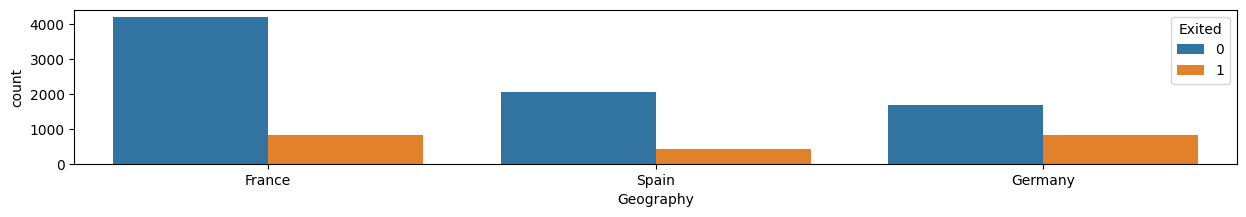

In [ ]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'Geography',hue='Exited')
plt.show()

**From the above chart there is no significant outcome which can tell us that Geography is an important variable for predicting the churn rate**

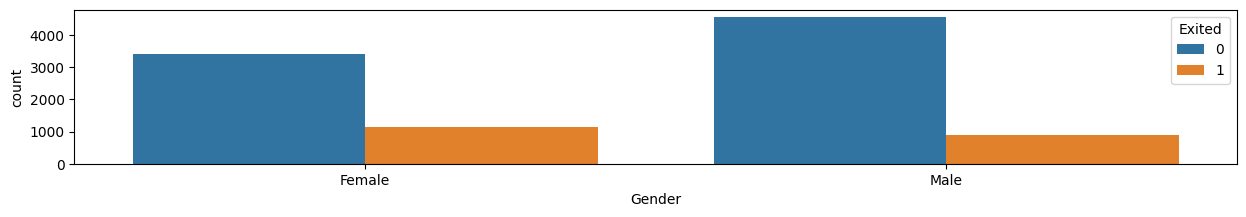

In [ ]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'Gender',hue='Exited')
plt.show()

**From the above chart there is no significant outcome which can tell us that Gender is an important variable for predicting the churn rate**

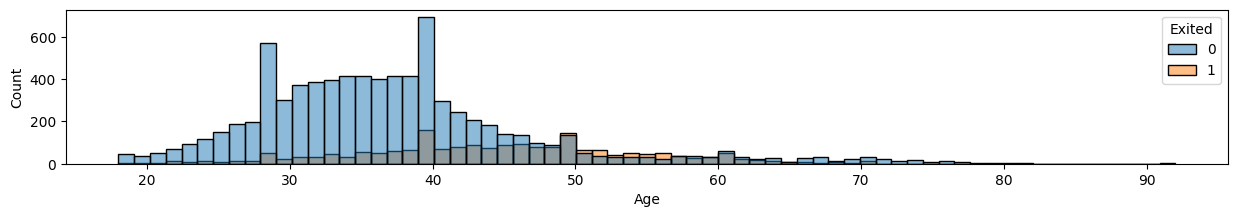

In [ ]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'Age',hue='Exited')
plt.show()

**From the above chart we can say that customers with lower age are more loyal to the company**

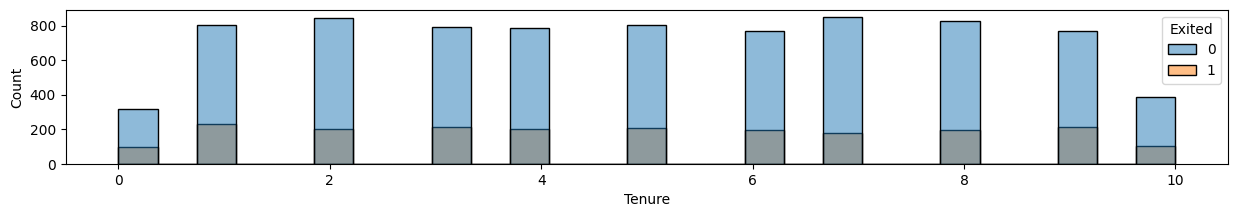

In [ ]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'Tenure',hue='Exited')
plt.show()

**From the above chart there is no significant outcome which can tell us that Tenure is an important variable for predicting the churn rate**

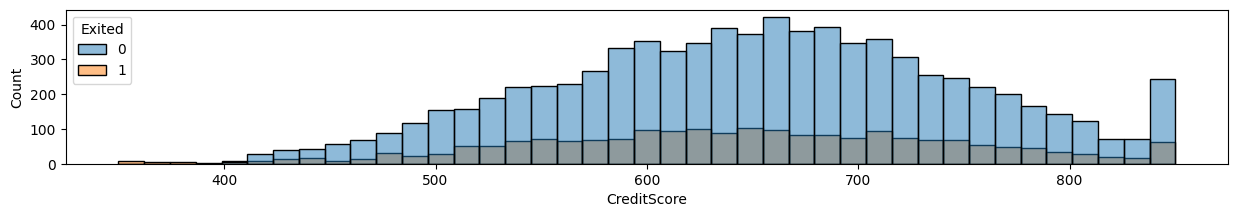

In [ ]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'CreditScore',hue='Exited')
plt.show()

**From the above chart there is no significant outcome which can tell us that Credit Score is an important variable for predicting the churn rate**

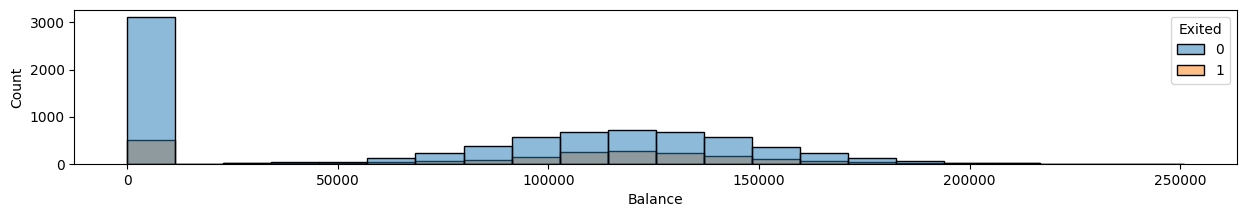

In [ ]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'Balance',hue='Exited')
plt.show()

**From the above chart there is no significant outcome which can tell us that Balance is an important variable for predicting the churn rate**

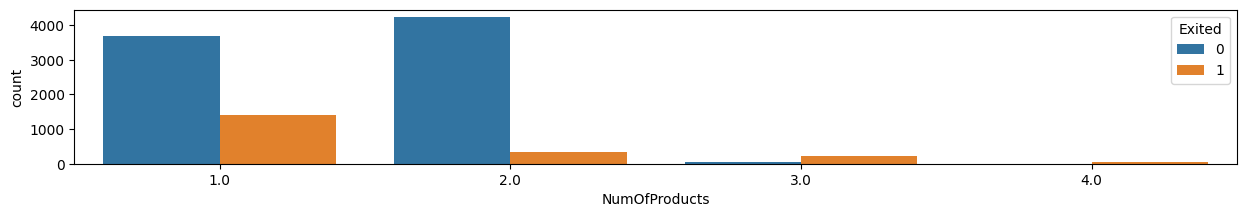

In [ ]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'NumOfProducts',hue='Exited')
plt.show()

**From the above chart we can say that people with higher number of products are more tend to leave the company**

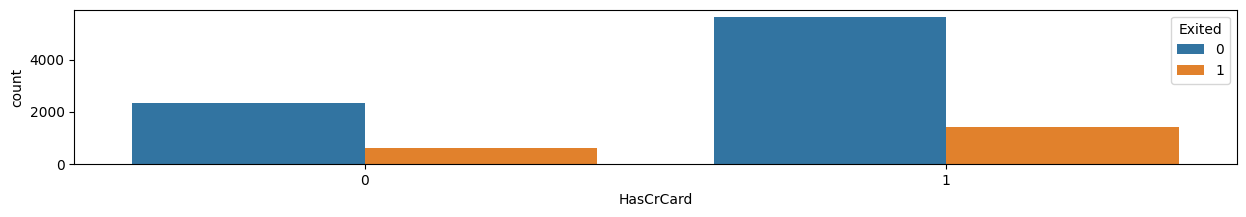

In [ ]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'HasCrCard',hue='Exited')
plt.show()

**From the above chart there is no significant outcome which can tell us that Has Credit Card is an important variable for predicting the churn rate**

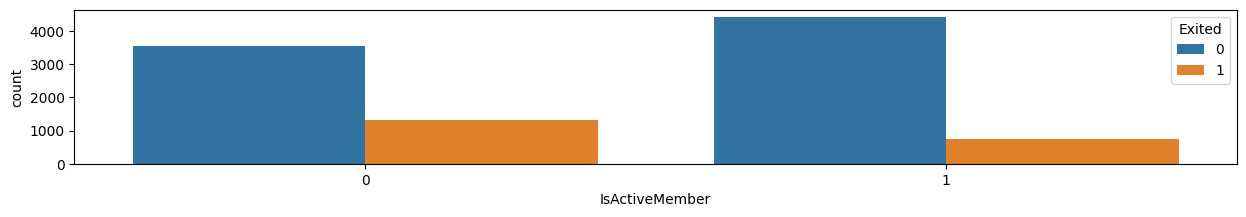

In [ ]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'IsActiveMember',hue='Exited')
plt.show()

**From the above chart there is no significant outcome which can tell us that IsActiveMember is an important variable for predicting the churn rate**

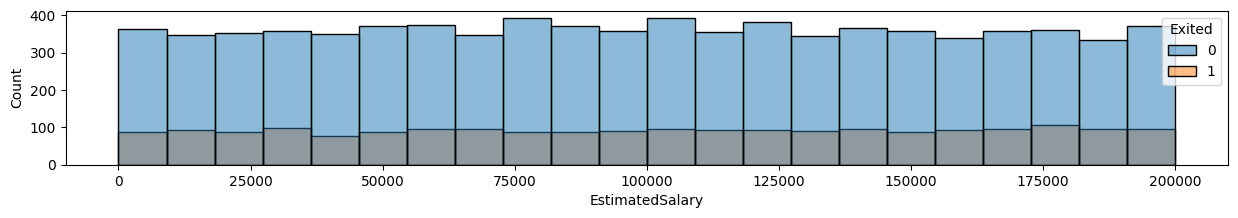

In [ ]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'EstimatedSalary',hue='Exited')
plt.show()

**From the above chart there is no significant outcome which can tell us that Salary is an important variable for predicting the churn rate**

<a id="null"></a>
# Missing Value Treatment

In [ ]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
dataset.isnull().sum()/len(dataset)*100

,0
CreditScore,0.00
Geography,0.00
Gender,0.00
Age,0.08
Tenure,0.06
Balance,0.08
NumOfProducts,0.09
HasCrCard,0.00
IsActiveMember,0.00
EstimatedSalary,0.08


In [ ]:
# Separating the numerical and categorical columns

def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(dataset)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

In [ ]:
# Function to Impute the missing values
def missing_value_imputation(dataset, numerical, categorical):
    """
    Function to automate the process of missing value imputation
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in numerical:
        dataset[i] = dataset[i].fillna(dataset[i].median())
    for i in categorical:
        dataset[i] = dataset[i].fillna(dataset[i].mode()[0])
    return dataset

dataset = missing_value_imputation(dataset, numerical, categorical)


<a id="enc"></a>
# Encoding and Feature Scaling

In [ ]:
# Separating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler

def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset = encoding(dataset, categorical)

def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset = feature_scaling(dataset, numerical)

In [ ]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293717,-1.042355,-1.226579,-0.910592,1,1,0.021677,1
1,-0.440036,2,0,0.198323,-1.388261,0.117023,-0.910592,0,1,0.216363,0
2,-1.536794,0,0,0.293717,1.033084,1.333091,2.530799,1,0,0.240521,1
3,0.501521,0,0,0.007536,-1.388261,-1.226579,0.810103,0,0,0.002358,0
4,2.063884,2,0,0.389110,-1.042355,0.785601,-0.910592,1,1,0.002358,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007536,-0.004635,-1.226579,0.810103,1,0,-0.066646,0
9996,-1.391939,0,1,-0.374038,1.724897,-0.306834,-0.910592,1,1,0.027780,0
9997,0.604988,0,0,-0.278645,0.687178,-1.226579,-0.910592,0,1,-1.009059,1
9998,1.256835,1,1,0.293717,-0.696448,-0.022977,0.810103,1,0,-0.125470,1


<a id="sd"></a>
# Splitting the data into Train and Test

In [ ]:
x = dataset.iloc[:,0:10]

In [ ]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0,0,0.293717,-1.042355,-1.226579,-0.910592,1,1,0.021677
1,-0.440036,2,0,0.198323,-1.388261,0.117023,-0.910592,0,1,0.216363
2,-1.536794,0,0,0.293717,1.033084,1.333091,2.530799,1,0,0.240521
3,0.501521,0,0,0.007536,-1.388261,-1.226579,0.810103,0,0,0.002358
4,2.063884,2,0,0.389110,-1.042355,0.785601,-0.910592,1,1,0.002358
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007536,-0.004635,-1.226579,0.810103,1,0,-0.066646
9996,-1.391939,0,1,-0.374038,1.724897,-0.306834,-0.910592,1,1,0.027780
9997,0.604988,0,0,-0.278645,0.687178,-1.226579,-0.910592,0,1,-1.009059
9998,1.256835,1,1,0.293717,-0.696448,-0.022977,0.810103,1,0,-0.125470


In [ ]:
y = dataset.iloc[:,-1]

In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
import statsmodels.api as sm
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
x = sm.add_constant(x)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code
# 'test_size' returns the proportion of data to be included in the testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', x_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', x_test.shape)
print('y_test', y_test.shape)

X_train (8000, 11)
y_train (8000,)
X_test (2000, 11)
y_test (2000,)


In [ ]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function
def update_score_card(model, cutoff):

    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(x_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]

    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)},
                                    ignore_index = True)

<a id="model"></a>
# Creating the model on training dataset and understand the feature importance using the weights

In [ ]:
# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg_ini = sm.Logit(y_train, x_train).fit()

# print the summary of the model
logreg_ini.summary()

Optimization terminated successfully.
         Current function value: 0.432510
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7989
Method:                           MLE   Df Model:                           10
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:                  0.1401
Time:                        11:14:21   Log-Likelihood:                -3460.1
converged:                       True   LL-Null:                       -4023.9
Covariance Type:            nonrobust   LLR p-value:                5.675e-236
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8095      0.073    -11.061      0.000      -0.953      -0.666
CreditScore        -0.0516      0.030     -1.720      0.085      -0.111       0.007
Geography           0.0704      0.037      1.899      0.058      -0.002       0.143
Gender             -0.5669      0.061     -9.357      0.000      -0.686      -0.448
Age                 0.7609      0.030     25.568      0.000       0.703       0.819
Tenure             -0.0181      0.030     -0.597      0.550      -0.078       0.041
Balance             0.3115      0.032      9.654      0.000       0.248       0.375
NumOfProducts      -0.0279      0.030     -0.920      0.358      -0.087       0.032
HasCrCard          -0.0321      0.066     -0.485      0.628      -0.162       0.098
IsActiveMember     -1.0979      0.065    -16.988      0.000      -1.225      -0.971
EstimatedSalary     0.0386      0.030      1.274      0.203      -0.021       0.098
===================================================================================
"""

**Interpretation:** The `Pseudo R-squ.` obtained from the above model summary is the value of `McFadden's R-squared`. This value can be obtained from the formula:

<p style='text-indent:25em'> <strong> McFadden's R-squared = $ 1 - \frac{Log-Likelihood}{LL-Null} $</strong> </p>

Where,<br>
Log-Likelihood: It is the maximum value of the log-likelihood function<br>
LL-Null: It is the maximum value of the log-likelihood function for the model containing only the intercept

The LLR p-value is less than 0.05, implies that the model is significant.

In [ ]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [ ]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg_ini.aic)

AIC: 6942.16792999895


We can use the AIC value to compare different models created on the same dataset.

**Interpreting the odds**

In [ ]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg_ini.params), columns= ['Odds'])

# print the dataframe
df_odds

,Odds
const,0.445092
CreditScore,0.949662
Geography,1.072893
Gender,0.567264
Age,2.140222
Tenure,0.982020
Balance,1.365431
NumOfProducts,0.972482
HasCrCard,0.968417
IsActiveMember,0.333560


**Interpretation:**

odds_const: The odds of churn is 0.445092, considering all other variables take zero value

odds_creditscore: The odds of chrun is increase by the factor of 0.949662 due to an unit increase of Credit score and keeping the other variables as constant

odds_geography: The odds of chrun is increase by the factor of 1.072893 due to a change in the geography

odds_gender: The odds of chrun is increase by the factor of 0.567264 due to an change in the gender

odds_Age: The odds of chrun is increase by the factor of 2.140222 due to an unit increase of age and keeping the other variables as constant

odds_tenure: The odds of chrun is increase by the factor of 0.982020 due to an unit increase of tenure and keeping the other variables as constant

odds_balance: The odds of chrun is increase by the factor of 0.949662 due to an unit increase of Credit score and keeping the other variables as constant

odds_noofproducts: The odds of chrun is increase by the factor of 1.365431 due to an unit increase of no of products and keeping the other variables as constant

odds_hascrcard: The odds of chrun is increase by the factor of 0.968417 due to card availability and keeping the other variables as constant

odds_isactivemember: The odds of chrun is increase by the factor of 0.333560 due to an activity by the user and keeping the other variables as constant

odds_esimatedsalary: The odds of chrun is increase by the factor of 1.039406 due to an unit increase of salary and keeping the other variables as constant

In [ ]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_ini.predict(x_test)

# print the y_pred_prob
y_pred_prob.head()

,0
937,0.224154
9355,0.268903
2293,0.437551
192,0.171382
8675,0.480327


In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_ini = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [ ]:
# print the first five observations of y_pred
y_pred_ini[0:5]

[0, 0, 0, 0, 0]

In [ ]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_ini)

0.7995

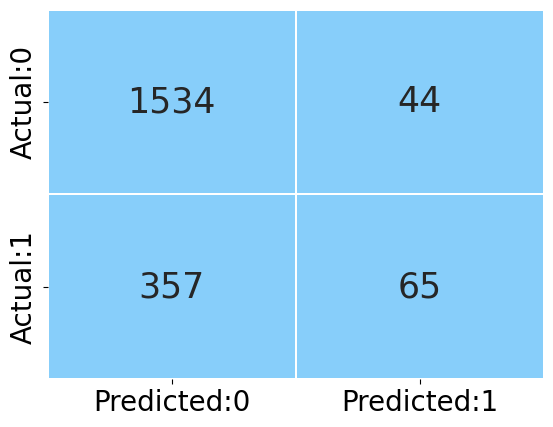

In [ ]:
# create a confusion matrix
from matplotlib.colors import ListedColormap

cm = confusion_matrix(y_test, y_pred_ini)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_ini)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1578
           1       0.60      0.15      0.24       422

    accuracy                           0.80      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.80      0.75      2000



In [ ]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_ini)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.17319928577614108


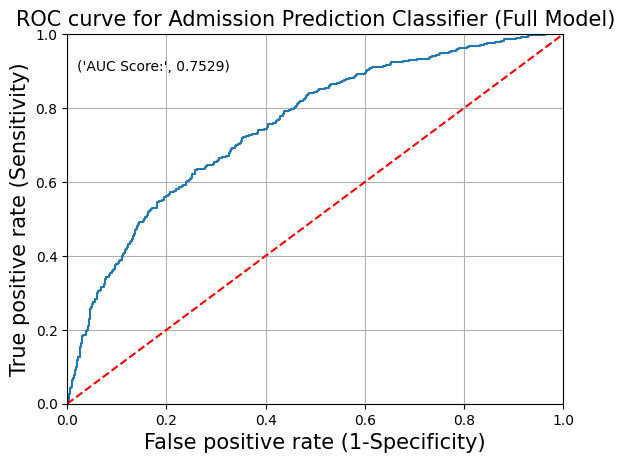

In [ ]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

# plot the grid
plt.grid(True)

In [ ]:
def update_score_card(model, cutoff):
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(x_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]

    # assign 'score_card' as global variable
    global score_card

    #Instead of using append, use pd.concat to add a new row
    #Create a DataFrame for the new row
    new_row = pd.DataFrame([{'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}])

    #Concatenate the new row to the existing score_card
    score_card = pd.concat([score_card, new_row], ignore_index=True)

In [ ]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg_ini, value)

<ipython-input-43-99b1dd1560a8>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score_card = pd.concat([score_card, new_row], ignore_index=True)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
score_card

,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.1,0.647639,0.284644,0.900474,0.5015,0.164733,0.432555
1,0.2,0.676425,0.366402,0.656398,0.6880,0.273547,0.470289
2,0.3,0.667258,0.476190,0.473934,0.7790,0.335098,0.475059
3,0.4,0.618003,0.568182,0.296209,0.8040,0.286183,0.389408
4,0.5,0.563073,0.596330,0.154028,0.7995,0.173199,0.244821
5,0.6,0.527706,0.580000,0.068720,0.7930,0.081836,0.122881
6,0.7,0.511683,0.600000,0.028436,0.7910,0.035889,0.054299
7,0.8,0.500868,0.500000,0.002370,0.7890,0.002732,0.004717
8,0.9,0.500000,0.000000,0.000000,0.7890,0.000000,0.000000


In [ ]:
# print the score card
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset'
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.647639,0.284644,0.900474,0.501500,0.164733,0.432555
1,0.200000,0.676425,0.366402,0.656398,0.688000,0.273547,0.470289
2,0.300000,0.667258,0.476190,0.473934,0.779000,0.335098,0.475059
3,0.400000,0.618003,0.568182,0.296209,0.804000,0.286183,0.389408
4,0.500000,0.563073,0.596330,0.154028,0.799500,0.173199,0.244821
5,0.600000,0.527706,0.580000,0.068720,0.793000,0.081836,0.122881
6,0.700000,0.511683,0.600000,0.028436,0.791000,0.035889,0.054299
7,0.800000,0.500868,0.500000,0.002370,0.789000,0.002732,0.004717
8,0.900000,0.500000,0.000000,0.000000,0.789000,0.000000,0.000000


**Removing statistically insignificant variables**

In [ ]:
#Removing the insignificant variables
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293717,-1.042355,-1.226579,-0.910592,1,1,0.021677,1
1,-0.440036,2,0,0.198323,-1.388261,0.117023,-0.910592,0,1,0.216363,0
2,-1.536794,0,0,0.293717,1.033084,1.333091,2.530799,1,0,0.240521,1
3,0.501521,0,0,0.007536,-1.388261,-1.226579,0.810103,0,0,0.002358,0
4,2.063884,2,0,0.389110,-1.042355,0.785601,-0.910592,1,1,0.002358,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,0.007536,-0.004635,-1.226579,0.810103,1,0,-0.066646,0
9996,-1.391939,0,1,-0.374038,1.724897,-0.306834,-0.910592,1,1,0.027780,0
9997,0.604988,0,0,-0.278645,0.687178,-1.226579,-0.910592,0,1,-1.009059,1
9998,1.256835,1,1,0.293717,-0.696448,-0.022977,0.810103,1,0,-0.125470,1


In [ ]:
x = dataset.iloc[:,[2,3,5,8]]

In [ ]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
x = sm.add_constant(x)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code
# 'test_size' returns the proportion of data to be included in the testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', x_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', x_test.shape)
print('y_test', y_test.shape)

X_train (8000, 5)
y_train (8000,)
X_test (2000, 5)
y_test (2000,)


In [ ]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg_tuned = sm.Logit(y_train, x_train).fit()

# print the summary of the model
logreg_tuned.summary()

Optimization terminated successfully.
         Current function value: 0.433102
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7995
Method:                           MLE   Df Model:                            4
Date:                Fri, 07 Feb 2025   Pseudo R-squ.:                  0.1389
Time:                        11:14:23   Log-Likelihood:                -3464.8
converged:                       True   LL-Null:                       -4023.9
Covariance Type:            nonrobust   LLR p-value:                8.537e-241
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.7760      0.048    -16.051      0.000      -0.871      -0.681
Gender            -0.5659      0.061     -9.352      0.000      -0.684      -0.447
Age                0.7615      0.030     25.616      0.000       0.703       0.820
Balance            0.3235      0.031     10.422      0.000       0.263       0.384
IsActiveMember    -1.1018      0.065    -17.080      0.000      -1.228      -0.975
==================================================================================
"""

In [ ]:
# 'aic' retuns the AIC value for the model
print('AIC:', logreg_tuned.aic)

AIC: 6939.638887517525


In [ ]:
# take the exponential of the coefficient of a variable to calculate the odds
# 'params' returns the coefficients of all the independent variables
# pass the required column name to the parameter, 'columns'
df_odds = pd.DataFrame(np.exp(logreg_tuned.params), columns= ['Odds'])

# print the dataframe
df_odds

,Odds
const,0.460254
Gender,0.567860
Age,2.141525
Balance,1.382010
IsActiveMember,0.332281


**Interpretation:**

odds_const: The odds of churn is 0.460254, considering all other variables take zero value

odds_gender: The odds of chrun is increase by the factor of 0.567860 due to an change in the gender

odds_Age: The odds of chrun is increase by the factor of 2.141525 due to an unit increase of age and keeping the other variables as constant

odds_balance: The odds of chrun is increase by the factor of 1.382010 due to an unit increase of Credit score and keeping the other variables as constant

odds_isactivemember: The odds of chrun is increase by the factor of 0.332281 due to an activity by the user and keeping the other variables as constant

In [ ]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_tuned.predict(x_test)

# print the y_pred_prob
y_pred_prob.head()

,0
937,0.224685
9355,0.250783
2293,0.393769
192,0.159719
8675,0.502710


In [ ]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_tuned = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [ ]:
# print the first five observations of y_pred
y_pred_tuned[0:5]

[0, 0, 0, 0, 1]

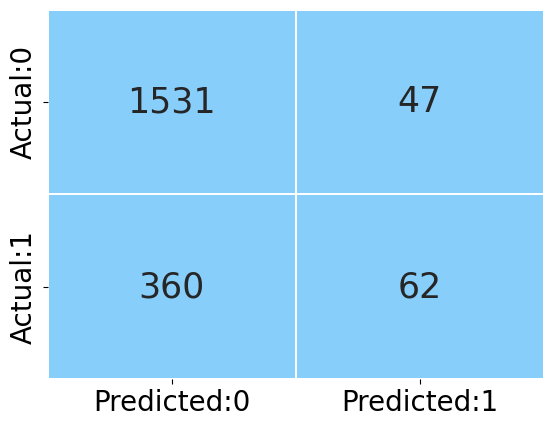

In [ ]:
# create a confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])


sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)

plt.yticks(fontsize = 20)

plt.show()

In [ ]:
# calculate various performance measures
acc_table = classification_report(y_test, y_pred_tuned)

# print the table
print(acc_table)

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1578
           1       0.57      0.15      0.23       422

    accuracy                           0.80      2000
   macro avg       0.69      0.56      0.56      2000
weighted avg       0.76      0.80      0.75      2000



In [ ]:
# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_tuned)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.16082820277029775


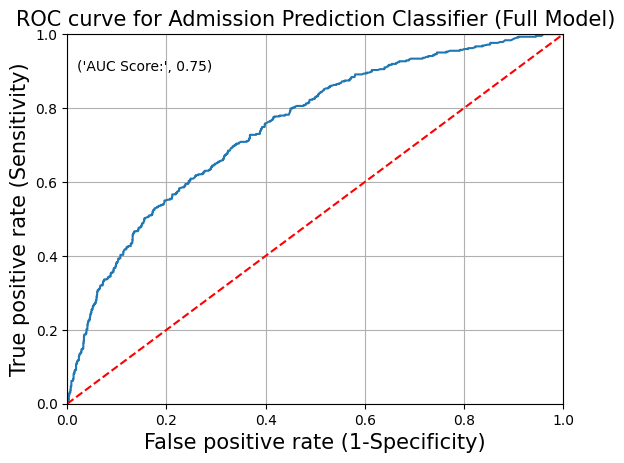

In [ ]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

# plot the grid
plt.grid(True)

In [ ]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card(logreg_tuned, value)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# print the score card
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset'
score_card.style.highlight_max(color = 'lightblue', subset = ['AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,0.100000,0.647639,0.284644,0.900474,0.501500,0.164733,0.432555
1,0.100000,0.643520,0.281899,0.900474,0.495000,0.159135,0.429379
2,0.200000,0.676425,0.366402,0.656398,0.688000,0.273547,0.470289
3,0.200000,0.672540,0.359638,0.658768,0.680500,0.264498,0.465272
4,0.300000,0.667258,0.476190,0.473934,0.779000,0.335098,0.475059
5,0.300000,0.665605,0.479319,0.466825,0.780500,0.334403,0.472989
6,0.400000,0.618003,0.568182,0.296209,0.804000,0.286183,0.389408
7,0.400000,0.621241,0.571429,0.303318,0.805000,0.292802,0.396285
8,0.500000,0.563073,0.596330,0.154028,0.799500,0.173199,0.244821
9,0.500000,0.558567,0.568807,0.146919,0.796500,0.160828,0.233522


In [ ]:
# create an empty dataframe to store the scores for various algorithms
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_auc_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])

# append the result table for all performance scores

def update_score_card_final(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card

    #Instead of using append, use pd.concat to add a new row
    #Create a DataFrame for the new row
    new_row = pd.DataFrame([{'model_name':model_name,
                                    'Accuracy Score' : accuracy_score(y_test, y_pred),
                                    'Precision Score': precision_score(y_test, y_pred),
                                    'Recall Score': recall_score(y_test, y_pred),
                                    'AUC Score': roc_auc_score(y_test, y_pred),
                                    'f1 Score': f1_score(y_test, y_pred)}])

    #Concatenate the new row to the existing score_card
    score_card = pd.concat([score_card, new_row], ignore_index=True)

In [ ]:
update_score_card_final(y_test,y_pred_ini,'initial_model')

<ipython-input-62-04a303b3565c>:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  score_card = pd.concat([score_card, new_row], ignore_index=True)


In [ ]:
update_score_card_final(y_test,y_pred_tuned,'tuned_model')

In [ ]:
score_card

,model_name,Accuracy Score,Precision Score,Recall Score,AUC Score,f1 Score
0,initial_model,0.7995,0.596330,0.154028,0.563073,0.244821
1,tuned_model,0.7965,0.568807,0.146919,0.558567,0.233522


**Interpretation: Overall we have implemented all the tuning steps and we can conclude that the model which we got is performing well on the dataset**